# Noise Removal Analysis

## Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

nrm_df = pd.read_csv('SNR_Methods.csv', index_col = 0)
print(f"Total Method Count: {nrm_df.shape[0]}")
nrm_df[['NAME']]

Total Method Count: 59


,NAME
ID,
1,DBA
2,NASNLM
3,PARIGI
4,NLSF
5,NLSF-MLP
6,NLSF-CNN
7,MF
8,AMF
9,DBUTMF


### Dataset Rank & Noise Generation Rank

Both ranks will be used to filter duplicated entries

In [3]:
nrm_df["DATASET"] = nrm_df["DATASET"].astype("category")
nrm_df["NOISE TYPE"] = nrm_df["NOISE TYPE"].astype("category")

#### Datasets

In [4]:
list_of_datasets = nrm_df['DATASET'].unique()
print("Datasets")
print(*list_of_datasets,sep="\n")

Datasets
BSD300
Avg. of 11
Lena 512
SAR 3x(160x160) & 3X(420x420)
40 Images from the TESTIMAGES Gallery
Single Image
Average of Set14 & BSD300
Single CT Scan
Single Ultrasound
Single SAR
BSDS500
200 Ultrasound
House 256
Lin 256


In [5]:
sorted_datasets = ["Average of Set14 & BSD300","BSD300","BSDS500", "40 Images from the TESTIMAGES Gallery","SAR 3x(160x160) & 3X(420x420)","Avg. of 11","Single CT Scan","Lena 512","Single Image","Single Ultrasound"]
if len(sorted_datasets) == len(list_of_datasets): 
    print("All datasets accounted for")
nrm_df["DATASET"] = nrm_df["DATASET"].cat.set_categories(sorted_datasets, ordered=True)
print(str(nrm_df["DATASET"])[-245:])

                  NaN
Name: DATASET, dtype: category
Categories (10, object): ['Average of Set14 & BSD300' < 'BSD300' < 'BSDS500' < '40 Images from the TESTIMAGES Gallery' ... 'Single CT Scan' < 'Lena 512' < 'Single Image' < 'Single Ultrasound']


### Noise Type

In [6]:
list_of_noise = nrm_df['NOISE TYPE'].unique()
print("\n")
print("Noise Types")
print(*list_of_noise,sep="\n")



Noise Types
Salt & Pepper
Speckle
Gaussian


In [7]:
sorted_noise_types = ["Speckle","Salt & Pepper","Gaussian"]
if len(list_of_noise) == len(sorted_noise_types): 
    print("All noise types accounted for")
nrm_df["NOISE TYPE"] = nrm_df["NOISE TYPE"].cat.set_categories(sorted_noise_types, ordered=True)
print(str(nrm_df["NOISE TYPE"])[-100:])

All noise types accounted for
Name: NOISE TYPE, dtype: category
Categories (3, object): ['Speckle' < 'Salt & Pepper' < 'Gaussian']


### Removal of Duplicated Entries

Some methods and their stats are referenced in different papers, a selection method based upon **Dataset Rank** and **Publication Year** will be performed to remove any duplicated method.

In [8]:
duplicated_df = nrm_df[nrm_df.duplicated(subset=['NAME'],keep=False)]
duplicated_df = duplicated_df[['NAME','DATASET','NOISE TYPE','Publication Year']]
print(f"Methods: {nrm_df.shape[0]} , Duplicated: {duplicated_df.shape[0]}")
duplicated_df.sort_values(by=['NAME','DATASET']).sort_values('NOISE TYPE')

Methods: 59 , Duplicated: 4


,NAME,DATASET,NOISE TYPE,Publication Year
ID,,,,
16,FROST,SAR 3x(160x160) & 3X(420x420),Speckle,2016
57,FROST,NaN,Speckle,2019
1,DBA,BSD300,Salt & Pepper,2019
18,DBA,40 Images from the TESTIMAGES Gallery,Salt & Pepper,2018


In [9]:
duplicated_df.sort_values(by=['NAME','DATASET']).sort_values('NOISE TYPE')
nrm_df = nrm_df.drop_duplicates('NAME',keep='first')

duplicated_df = nrm_df[nrm_df.duplicated(subset=['NAME'],keep=False)]
print(f"Methods: {nrm_df.shape[0]} , Duplicated: {duplicated_df.shape[0]}")

Methods: 57 , Duplicated: 0


## Data Analysis

### By Peak Signal to Noise Ratio

#### Remove empty columns and rows

In [10]:
psnr_df = nrm_df[['NAME','PSNR-10','PSNR-20','PSNR-25','PSNR-30','PSNR-40','PSNR-50','PSNR-60','PSNR-70','PSNR-80','PSNR-90']]
psnr_df.set_index('NAME',inplace=True)
psnr_df = psnr_df.dropna(how='all',axis=0)
psnr_df = psnr_df.dropna(how='all',axis=1)

In [11]:
psnr_df.describe()

,PSNR-10,PSNR-20,PSNR-25,PSNR-30,PSNR-40,PSNR-50,PSNR-60,PSNR-70,PSNR-80,PSNR-90
count,19.000000,25.000000,9.000000,20.000000,12.000000,30.000000,6.000000,10.00000,4.000000,7.000000
mean,46.969295,44.583080,26.101111,37.172370,37.824025,29.084103,26.256667,23.50600,20.097500,20.020000
std,15.686006,9.413296,14.082728,10.257263,10.402625,10.329719,6.076995,5.19837,8.593778,7.226659
min,15.750000,27.550000,5.210000,25.740000,23.710000,4.320000,14.320000,9.49000,7.550000,6.070000
25%,37.205000,43.013400,11.480000,29.987500,32.232500,26.267500,26.722500,23.10500,18.125000,17.930000
50%,44.657800,44.201400,32.670000,32.335000,36.224300,29.606550,28.000000,24.84500,23.225000,23.560000
75%,57.429750,44.252300,35.620000,43.886400,39.702350,33.044575,29.307500,26.10750,25.197500,24.365000
max,75.110900,64.509700,39.510000,61.622400,57.633800,53.568400,31.180000,28.16000,26.390000,25.920000


In [12]:
psnr_max = psnr_df.max().to_frame(name="Max Value")
psnr_max_name = psnr_df.idxmax().to_frame(name="NAME")
psnr_max = pd.merge(psnr_max,psnr_max_name, left_index=True, right_index=True)
display(psnr_max)

,Max Value,NAME
PSNR-10,75.1109,OCF - CS
PSNR-20,64.5097,BPDF - CS
PSNR-25,39.5100,N2C-Resnet
PSNR-30,61.6224,BPDF - CS
PSNR-40,57.6338,BPDF - CS
PSNR-50,53.5684,BPDF - MC
PSNR-60,31.1800,YA-CNN
PSNR-70,28.1600,DAMF
PSNR-80,26.3900,DAMF
PSNR-90,25.9200,DFT


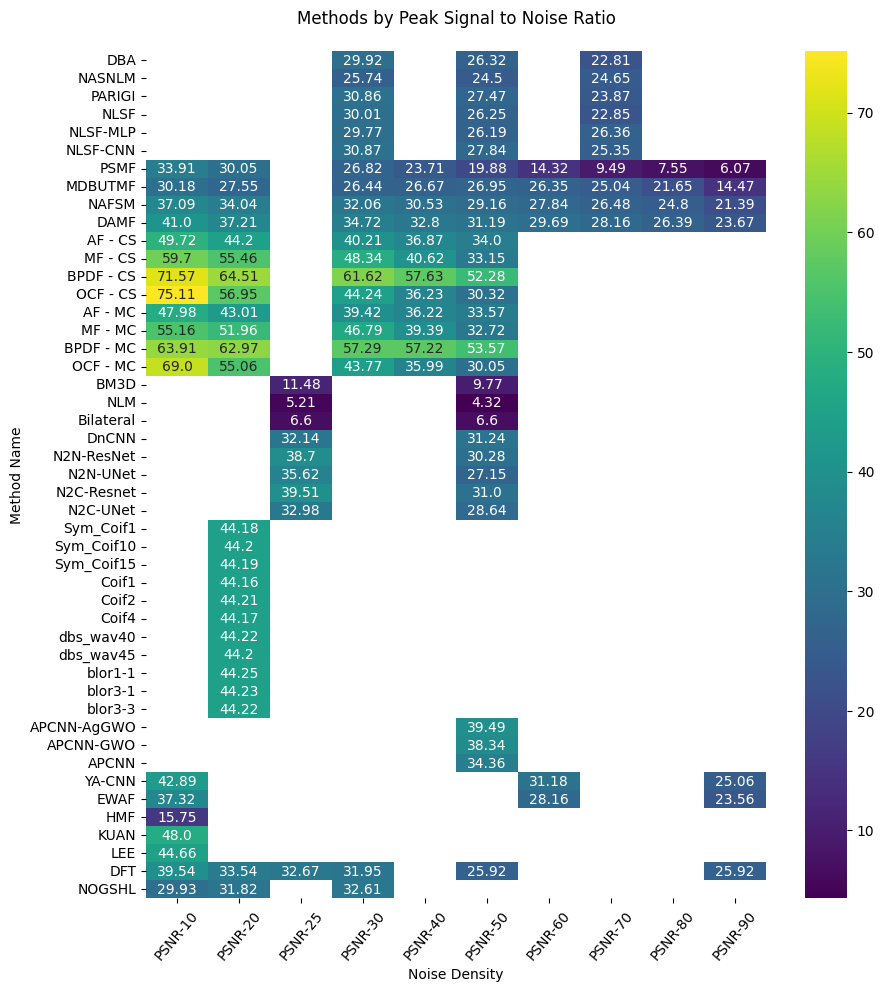

In [13]:
plt.figure(figsize = (10,11))
ax  = sb.heatmap(psnr_df,annot=True, cmap='viridis',fmt='.4')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set_ylabel('Method Name')
ax.set_xlabel('Noise Density')
plt.title("Methods by Peak Signal to Noise Ratio",pad=20)
plt.show()

### By Signal to Noise Ratio (SNR)

In [14]:
snr_df = nrm_df[['NAME','SNR-10','SNR-20','SNR-30','SNR-40','SNR-50','SNR-60','SNR-70','SNR-80','SNR-90']]
snr_df.set_index('NAME',inplace=True)
snr_df = snr_df.dropna(how='all',axis=0)
snr_df = snr_df.dropna(how='all',axis=1)
snr_df.describe()

,SNR-10,SNR-30,SNR-50,SNR-70,SNR-90
count,8.000000,5.000000,5.000000,5.000000,5.000000
mean,24.925000,19.644000,13.576000,4.878000,-2.912000
std,10.259926,5.758761,7.346076,6.244495,4.376182
min,3.240000,9.400000,1.050000,-4.260000,-7.630000
25%,24.147500,21.200000,13.660000,2.480000,-5.680000
50%,27.170000,22.340000,15.520000,4.890000,-4.720000
75%,28.877500,22.450000,18.640000,10.240000,1.400000
max,36.640000,22.830000,19.010000,11.040000,2.070000


In [15]:
snr_df_max = snr_df.max().to_frame(name="Max Value")
snr_df_max_name = snr_df.idxmax().to_frame(name="NAME")
snr_df_max = pd.merge(snr_df_max,snr_df_max_name, left_index=True, right_index=True)
display(snr_df_max)

,Max Value,NAME
SNR-10,36.64,KUAN
SNR-30,22.83,DBUTMPF
SNR-50,19.01,DBUTMPF
SNR-70,11.04,DBUTMPF
SNR-90,2.07,DBUTMPF


AttributeError: 'Axes' object has no attribute 'set_xtOREMicklabels'

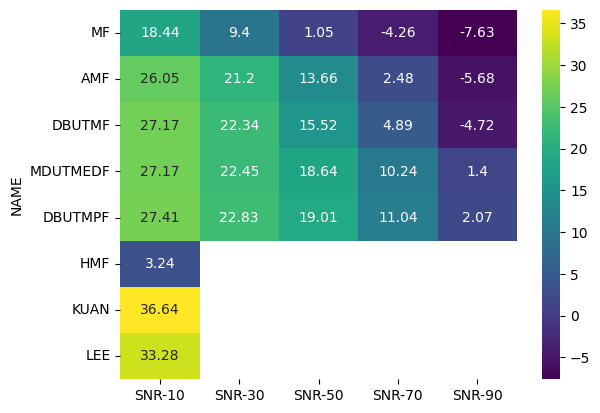

In [18]:
#plt.figure(dpi=300)
ax  = sb.heatmap(snr_df,annot=True,cmap='viridis',fmt='.4')
#ax.set_xtOREMicklabels(ax.get_xticklabels(),rotation = 50)
ax.set_ylabel('Method')
ax.set_xlabel('Noise Density')
plt.title("Methods by Signal to Noise Ratio",pad=20)
plt.show()

### By Edge Preservation Index (EPI)

In [ ]:
epi_df = nrm_df[['NAME','EPI-10','EPI-30','EPI-50','EPI-70','EPI-90']]
epi_df.set_index('NAME',inplace=True)
epi_df = epi_df.dropna(how='all',axis=0)
epi_df = epi_df.dropna(how='all',axis=1)
epi_df.describe()

,EPI-10,EPI-30,EPI-50,EPI-70,EPI-90
count,5.000000,5.000000,5.00000,5.000000,5.000000
mean,0.779720,0.584140,0.31546,0.081860,0.399260
std,0.160888,0.264866,0.17611,0.055544,0.538576
min,0.498700,0.111800,0.03600,0.014000,0.002800
25%,0.802300,0.667100,0.29000,0.053600,0.006300
50%,0.831300,0.710000,0.31940,0.063200,0.008800
75%,0.882300,0.710100,0.46490,0.138400,0.980800
max,0.884000,0.721700,0.46700,0.140100,0.997600


In [ ]:
epi_df_max = epi_df.max().to_frame(name="Max Value")
epi_df_max_name = epi_df.idxmax().to_frame(name="NAME")
epi_df_max = pd.merge(epi_df_max,epi_df_max_name, left_index=True, right_index=True)
display(epi_df_max)

,Max Value,NAME
EPI-10,0.8840,DBUTMPF
EPI-30,0.7217,MDUTMEDF
EPI-50,0.4670,DBUTMPF
EPI-70,0.1401,DBUTMPF
EPI-90,0.9976,DBUTMPF


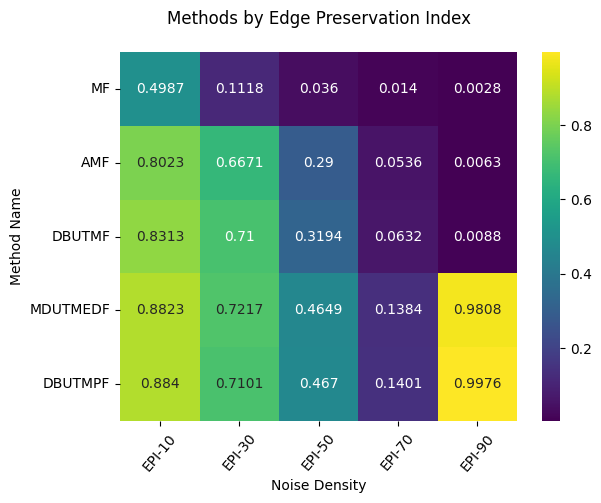

In [ ]:
#plt.figure(dpi=300)
ax  = sb.heatmap(epi_df,annot=True,cmap='viridis',fmt='.4')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set_ylabel('Method Name')
ax.set_xlabel('Noise Density')
plt.title("Methods by Edge Preservation Index",pad=20)
plt.show()

### By Structural Similarity Index (SSIM)

In [ ]:
ssim_df = nrm_df[['NAME','SSIM-10','SSIM-20','SSIM-30','SSIM-40','SSIM-50','SSIM-60','SSIM-70','SSIM-80','SSIM-90']]
ssim_df.set_index('NAME',inplace=True)
ssim_df = ssim_df.dropna(how='all',axis=0)
ssim_df = ssim_df.dropna(how='all',axis=1)
ssim_df.describe()

,SSIM-10,SSIM-20,SSIM-30,SSIM-40,SSIM-50,SSIM-60,SSIM-70,SSIM-80,SSIM-90
count,12.000000,5.000000,10.000000,4.000000,12.000000,6.000000,9.000000,4.000000,9.000000
mean,0.970700,0.918960,0.913930,0.859025,0.839800,0.789533,0.590211,0.603250,0.300089
std,0.032580,0.057103,0.088359,0.097537,0.208549,0.249444,0.326267,0.379042,0.279214
min,0.883500,0.834900,0.764000,0.743500,0.295900,0.282200,0.081700,0.038300,0.017100
25%,0.969975,0.901400,0.862100,0.797425,0.845750,0.869400,0.397900,0.565100,0.051400
50%,0.980750,0.916400,0.955800,0.868150,0.923650,0.876850,0.762800,0.764800,0.245500
75%,0.991275,0.960200,0.979950,0.929750,0.967025,0.906950,0.838500,0.802950,0.443800
max,0.997600,0.981900,0.990100,0.956300,0.984600,0.917400,0.888500,0.845100,0.759500


In [ ]:
ssim_df_max = ssim_df.max().to_frame(name="Max Value")
ssim_df_max_name = ssim_df.idxmax().to_frame(name="NAME")
ssim_df_max = pd.merge(ssim_df_max,ssim_df_max_name, left_index=True, right_index=True)
display(ssim_df_max)

,Max Value,NAME
SSIM-10,0.9976,DBUTMPF
SSIM-20,0.9819,DAMF
SSIM-30,0.9901,DBUTMPF
SSIM-40,0.9563,DAMF
SSIM-50,0.9846,APCNN-AgGWO
SSIM-60,0.9174,DAMF
SSIM-70,0.8885,DAMF
SSIM-80,0.8451,DAMF
SSIM-90,0.7595,DAMF


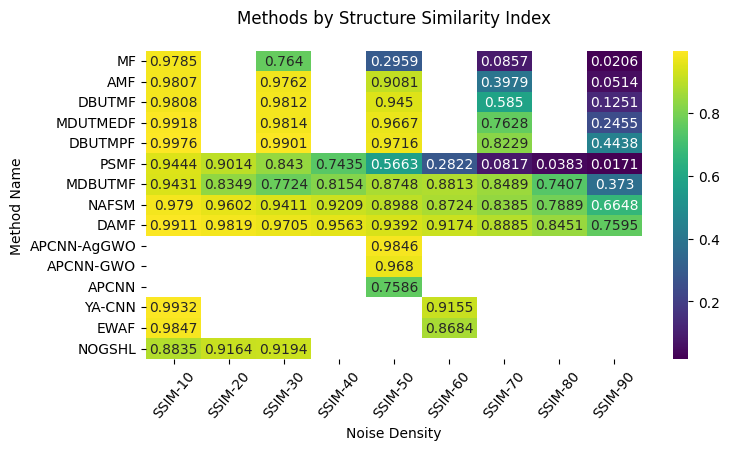

In [ ]:
plt.figure(figsize=(8,4))
ax  = sb.heatmap(ssim_df,annot=True,cmap='viridis',fmt='.4')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set_ylabel('Method Name')
ax.set_xlabel('Noise Density')
plt.title("Methods by Structure Similarity Index",pad=20)
plt.show()